In [1]:
import sys, os
sys.path.insert(1,"/opt/lumerical/v221/api/python/") #Default linux lumapi path
#sys.path.append(os.path.dirname("/media/lucas/datam01/LucasLobo/Design_MMI_LucasLobo/python")) 
import  lumapi
import matplotlib.pyplot as plt
import numpy as np
#import opencv
from scipy import ndimage
import math

In [2]:
mode = lumapi.MODE(filename= 'MMI2XN.lms')



In [3]:
mode.emepropagate()

In [16]:
campo = mode.getresult('EME','user s matrix')
campo = abs(campo)**2
campo = 10*np.log10(campo)
[print(*line) for line in campo]


-51.95765703381018 -56.29630959332549 -6.581060163001714 -5.909210681439811 -6.497936651335204 -5.913054439483112
-56.29630596670441 -51.95794312026092 -5.913054460425748 -6.497936230253545 -5.909211199732123 -6.581059918836852
-6.574317601488371 -5.908978064077745 -47.33146182386768 -50.31674979954989 -48.64955498787836 -50.92596866547096
-5.912274840485661 -6.491240953431631 -52.04615488820159 -41.68434020632614 -40.322619403315024 -49.489980449720015
-6.491241091669196 -5.912275514410417 -49.49000864008411 -40.32261305268469 -41.68435380421968 -52.046077047708735
-5.9089778468729985 -6.574317490685911 -50.92594835288282 -48.64953104799024 -50.31673379455822 -47.331448107269395


[None, None, None, None, None, None]

In [17]:
mode.setemeanalysis("mode convergence sweep", 1)
mode.emesweep("mode convergence sweep")
modos = mode.getemesweep("S_mode_convergence_sweep");

dict_keys(['modes', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


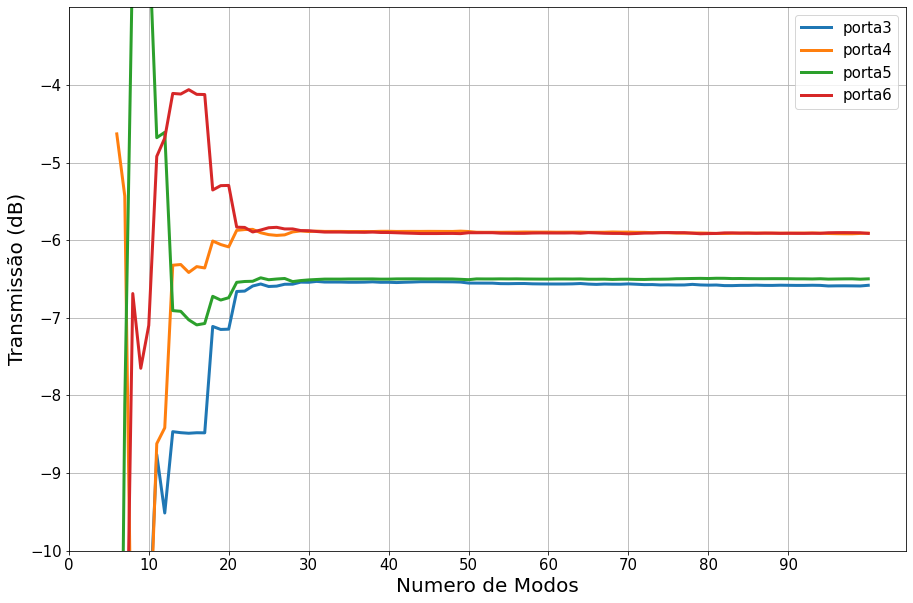

In [18]:
plt.rcParams["figure.figsize"] = (15,10)
print(modos.keys())
x = modos['modes']
s13 = modos['s13']
s14 = modos['s14']
s15 = modos['s15']
s16 = modos['s16']

plt.plot(x,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
plt.ylim(-10,-3)
plt.yticks(np.arange(-10,-3,step=1),fontsize=15)
plt.xticks(np.arange(0,100,step=10),fontsize=15)
plt.xlabel('Numero de Modos',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid()

In [19]:
mode.setemeanalysis("wavelength sweep",1)
mode.emesweep("wavelength sweep")
comprimentos = mode.getemesweep("S_wavelength_sweep")

dict_keys(['wavelength', 's11', 's21', 's31', 's41', 's51', 's61', 's12', 's22', 's32', 's42', 's52', 's62', 's13', 's23', 's33', 's43', 's53', 's63', 's14', 's24', 's34', 's44', 's54', 's64', 's15', 's25', 's35', 's45', 's55', 's65', 's16', 's26', 's36', 's46', 's56', 's66', 'Lumerical_dataset'])


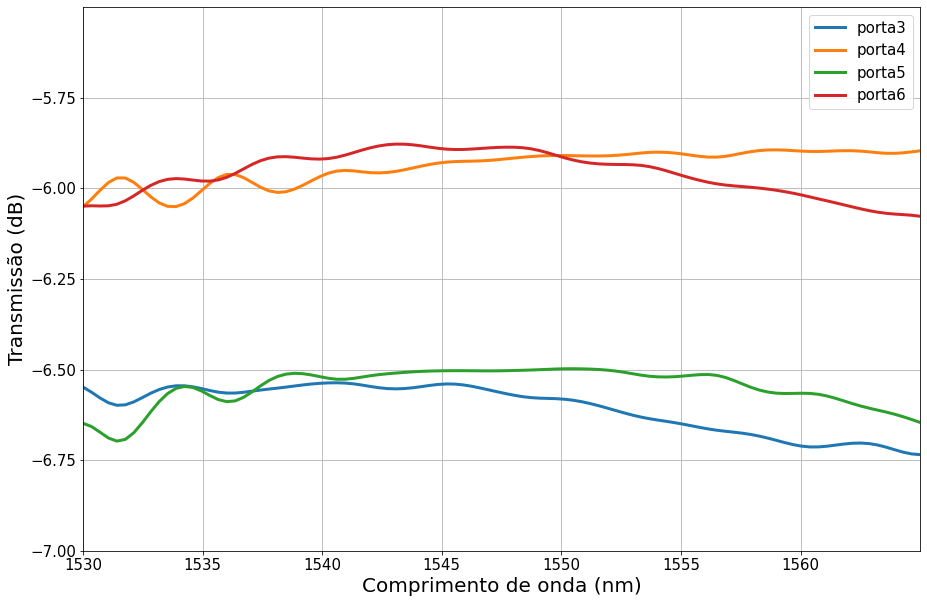

In [20]:
plt.rcParams["figure.figsize"] = (15,10)
print(comprimentos.keys())
x = comprimentos['wavelength']
s13 = comprimentos['s13']
s14 = comprimentos['s14']
s15 = comprimentos['s15']
s16 = comprimentos['s16']

plt.plot(x*1e9,10*np.log10(abs(s13)**2),label='porta3',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s14)**2),label='porta4',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s15)**2),label='porta5',linewidth=3)
plt.plot(x*1e9,10*np.log10(abs(s16)**2),label='porta6',linewidth=3)
plt.legend(fontsize=15)
plt.ylim(-7,-5.5)
plt.xlim(1530,1565)
plt.yticks(np.arange(-7,-5.5,step=0.25),fontsize=15)
plt.xticks(np.arange(1530,1565,step=5),fontsize=15)
plt.xlabel('Comprimento de onda (nm)',fontsize=20)
plt.ylabel('Transmissão (dB)',fontsize=20)
plt.grid()

In [65]:
campo = mode.getresult('monitor','field profile')

In [66]:
campo.keys()

dict_keys(['lambda', 'f', 'x', 'y', 'z', 'E', 'H', 'Lumerical_dataset'])

In [67]:
x = campo['x']
y = campo['y']
E = campo['E']

In [68]:


E = np.sqrt(E[:,:,0,:,0]**2 + E[:,:,0,:,1]**2 + E[:,:,0,:,2]**2)
E = np.transpose(abs(E[:,:,0]))
np.shape(x[:,0])

(100,)

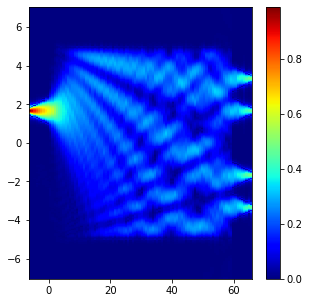

In [79]:
plt.rcParams["figure.figsize"] = (5,5)
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,E,cmap = 'jet')
plt.colorbar()
Elog = 10*np.log10(E)

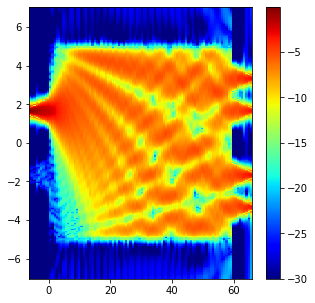

In [80]:
plt.pcolormesh(x[:,0]*1e6,y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30)
plt.colorbar()